# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [5]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [6]:
# %pip install --upgrade plotly

### Import Statements

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import iso3166 as iso
from datetime import datetime, timedelta
plt.style.use("fivethirtyeight")

### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [9]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [10]:
print(f"Data frame's shape : {df_data.shape}")
print(f"Data frame's columns :\n {df_data.columns}")
print(f"\nColumn is NaN :\n {df_data.isna().any()}")
print(f"\nNaN values count in Price column :\n { df_data.Price.isna().value_counts()}")

Data frame's shape : (4324, 9)
Data frame's columns :
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

Column is NaN :
 Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

NaN values count in Price column :
 Price
True     3360
False     964
Name: count, dtype: int64


In [11]:
df_data.head(3)

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [12]:
df_data.drop(columns=["Unnamed: 0.1","Unnamed: 0"], inplace=True)

In [13]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [14]:
# df_data.dropna(inplace=True)

In [15]:
print(f"The new shape of our Dataframe after cleaning : {df_data.shape}")

The new shape of our Dataframe after cleaning : (4324, 7)


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [17]:
# df_data['Price'].fillna(value="0", inplace=True)

In [18]:
df_data['Price'].sort_values()

3683    1,160.0
3149    1,160.0
3180    1,160.0
3243    1,160.0
3384    1,160.0
         ...   
4319        NaN
4320        NaN
4321        NaN
4322        NaN
4323        NaN
Name: Price, Length: 4324, dtype: object

**Converting to float type**

In [19]:
df_data['Price'] = df_data['Price'].apply(lambda s : str(s).replace(",",""))
df_data.Price = df_data.Price.astype("float")

In [20]:
df_data.shape

(4324, 7)

**Defining a function that Adds some missing values to make all records in the correct format to later cast it into a Datetime type**

In [21]:
def add_time(x):
    if "UTC" in x:
        return x
    else:
        x = x +' 12:00 UTC' 
        return x

In [22]:
df_data['Date'] = df_data['Date'].apply(lambda s : add_time(s))
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y %H:%M %Z')

In [23]:
# df_data['Mission_Status'] = df_data['Mission_Status'].astype('category')

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [25]:
df_data.describe()

Price
count   964.00
mean    153.79
std     288.45
min       5.30
25%      40.00
50%      62.00
75%     164.00
max   5,000.00

In [26]:
df_data[(df_data['Organisation'] == "NASA") & (df_data['Price'] > 0) ]['Price'].mean()
# df_data['Price'].sort_values().tail(20)

511.9463087248322

In [27]:
# df_data[(df_data['Organisation'] == "NASA") ]['Price'].sort_values()

In [28]:
mean_price_launch_per_org = df_data[(df_data['Price'] > 0) ].groupby("Organisation").mean(numeric_only=True).sort_values(by='Price')
mean_price_launch_per_org.head()

Price
Organisation       
Rocket Lab     7.50
Virgin Orbit  12.00
Sandia        15.00
EER           20.00
ExPace        28.30

In [29]:
ussr_mask = df_data['Organisation'] == "RVSN USSR"
price_null = df_data['Price'] == 0

In [30]:
# filling the missing price values of each Org with itsown price mean
for org in mean_price_launch_per_org.index:
    mean_price = mean_price_launch_per_org.loc[org,'Price']
    df_data.loc[((df_data['Organisation'] == org) & price_null), "Price"] = mean_price
    # print(f"the mean price launch for {org} is {mean_price}")
        

In [31]:
df_data.groupby("Organisation").mean(numeric_only=True).sort_values(by='Price')

Price
Organisation             
Rocket Lab           7.50
Virgin Orbit        12.00
Sandia              15.00
EER                 20.00
ExPace              28.30
Kosmotras           29.00
ISRO                32.49
Lockheed            35.00
ESA                 37.00
CASC                40.13
Eurockot            41.80
VKS RF              46.94
Northrop            47.35
Roscosmos           51.63
SpaceX              54.99
JAXA                56.00
US Air Force        59.65
Martin Marietta     80.16
MHI                 95.47
ILS                101.54
ULA                151.00
Arianespace        170.26
Boeing             177.29
NASA               511.95
RVSN USSR        5,000.00
AEB                   NaN
AMBA                  NaN
ASI                   NaN
Arm??e de l'Air       NaN
Blue Origin           NaN
CASIC                 NaN
CECLES                NaN
CNES                  NaN
Douglas               NaN
Exos                  NaN
General Dynamics      NaN
IAI                   NaN
IRGC                  NaN
ISA                   NaN
ISAS                  NaN
KARI                  NaN
KCST                  NaN
Khrunichev            NaN
Land Launch           NaN
Landspace             NaN
MITT                  NaN
OKB-586               NaN
OneSpace              NaN
RAE                   NaN
SRC                   NaN
Sea Launch            NaN
Starsem               NaN
US Navy               NaN
UT                    NaN
Yuzhmash              NaN
i-Space               NaN

**The mean after ignoring the ouliers and null values**

In [32]:
# the mean after ignoring the ouliers and null values 
mean_no_outliers = df_data[(df_data['Price'] > 2) & (df_data['Price'] < 30)]['Price'].mean()
mean_no_outliers

23.174751773049646

**Now we fill the missing price values of the rest companies that have no record with this mean**

In [33]:
df_data.fillna({"Price":mean_no_outliers},inplace=True)

In [34]:
df_data.groupby("Organisation").mean(numeric_only=True).sort_values(by='Price')

Price
Organisation           
Rocket Lab         7.50
Virgin Orbit      12.00
Sandia            15.00
EER               20.00
AEB               23.17
KARI              23.17
KCST              23.17
Yuzhmash          23.17
Land Launch       23.17
Landspace         23.17
MITT              23.17
OneSpace          23.17
ISAS              23.17
RAE               23.17
SRC               23.17
Sea Launch        23.17
Starsem           23.17
US Navy           23.17
UT                23.17
OKB-586           23.17
ISA               23.17
Khrunichev        23.17
CNES              23.17
AMBA              23.17
ASI               23.17
Arm??e de l'Air   23.17
Blue Origin       23.17
CASIC             23.17
CECLES            23.17
IRGC              23.17
Douglas           23.17
i-Space           23.17
General Dynamics  23.17
IAI               23.17
Exos              23.17
ExPace            23.69
ESA               24.24
Lockheed          24.37
VKS RF            27.08
Martin Marietta   27.67
RVSN USSR         28.78
Kosmotras         29.00
US Air Force      29.07
Boeing            31.11
ISRO              31.39
CASC              33.85
Roscosmos         35.07
JAXA              37.24
Eurockot          41.80
ILS               45.32
Northrop          47.35
SpaceX            54.67
MHI               55.02
Arianespace       73.78
ULA              112.65
NASA             381.93

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organization.

In [35]:
# df_data['Organisation'].value_counts().rename_axis("Country").reset_index(name='counts')

In [36]:
# launches_per_Company = df_data['Organisation'].value_counts().rename_axis("Organisation").reset_index(name='counts')

Text(0.5, 1.0, 'Number of Launches per Company')

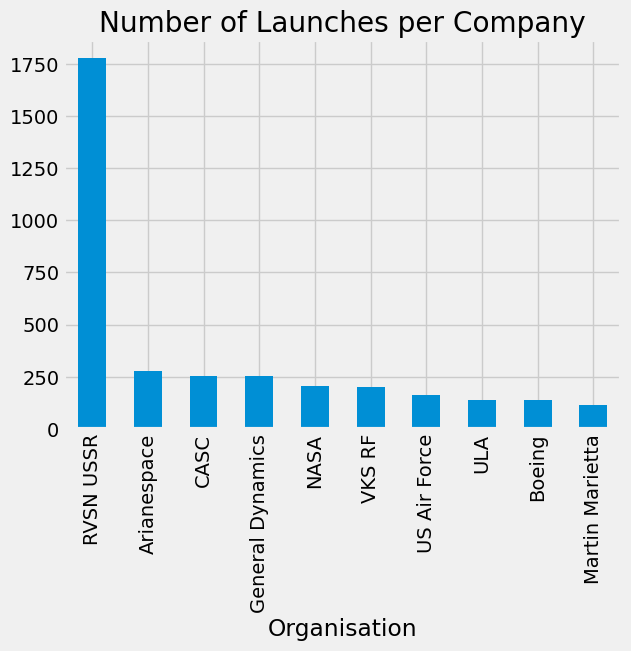

In [37]:
df_data['Organisation'].value_counts().head(10).plot(kind='bar')
plt.title("Number of Launches per Company")

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

<Axes: ylabel='Rocket_Status'>

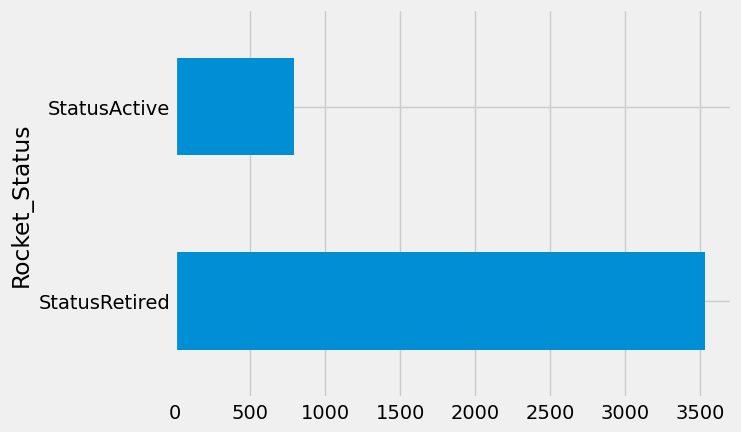

In [38]:
df_data.Rocket_Status.value_counts().plot(kind='barh')
# sns.histplot(df_data,x="Rocket_Status" ,stat='count')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [39]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [40]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

Mission_Status
Mission_Status                   
Failure                       339
Partial Failure               102
Prelaunch Failure               4
Success                      3879

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [41]:
df_data.Price.mean()

52.29483023992756

Text(0.5, 1.0, 'Total price distribution')

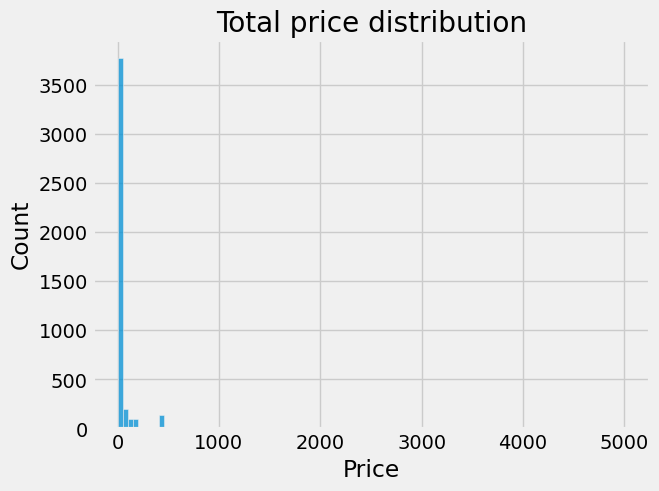

In [42]:
sns.histplot(data=df_data, x="Price",bins=100)
plt.title('Total price distribution')

In [43]:
df_data_adjusted = df_data[df_data['Price'].between(df_data['Price'].quantile(.05), df_data['Price'].quantile(.99))]

Text(0.5, 1.0, 'The price distribution without Outliers')

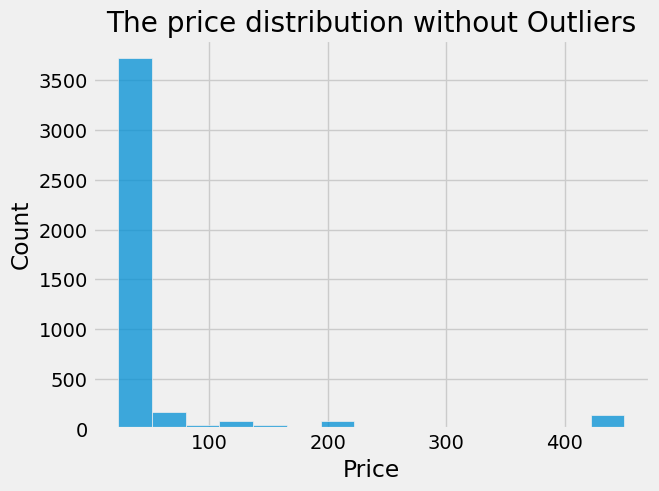

In [44]:
sns.histplot(data=df_data_adjusted, x="Price",bins=15)
plt.title('The price distribution without Outliers')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [45]:
df_data['Country'] = df_data['Location'].str.split(', ').str[-1]

In [46]:
df_data.Country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [47]:
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"
df_data.loc[(df_data['Country'] == 'Pacific Ocean'), "Country"] = "Russian Federation"


countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

df_data.head(2)


Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   

                       Date                                        Detail  \
0 2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   

  Rocket_Status  Price Mission_Status Country  
0  StatusActive  50.00        Success     USA  
1  StatusActive  29.75        Success     CHN

In [48]:
launches = df_data["Country"].value_counts().rename_axis('Country').reset_index(name="count")
launches.head()

Country  count
0     RUS   2135
1     USA   1351
2     FRA    303
3     CHN    269
4     JPN    126

In [49]:
fig = px.choropleth(launches, locations='Country', color='count',
                           color_continuous_scale="matter",
                           # range_color=(0, 12),
                           scope="world",
                           labels={'count':'Number of Launches by Country'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [50]:
statuses = df_data.groupby('Country')['Mission_Status'].value_counts().rename_axis((["Country", "Status"])).reset_index(name="counts")

failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()
failures

Status  counts
Country                                                 
AUS                                      Failure       3
BRA                     FailurePrelaunch Failure       3
CHN                       FailurePartial Failure      25
FRA                       FailurePartial Failure      18
IND                       FailurePartial Failure      13
IRN                     FailurePrelaunch Failure       9
ISR                                      Failure       2
JPN                       FailurePartial Failure      13
KOR                                      Failure       2
NZL                                      Failure       2
PRK                                      Failure       3
RUS      FailurePartial FailurePrelaunch Failure     189
USA      FailurePartial FailurePrelaunch Failure     163

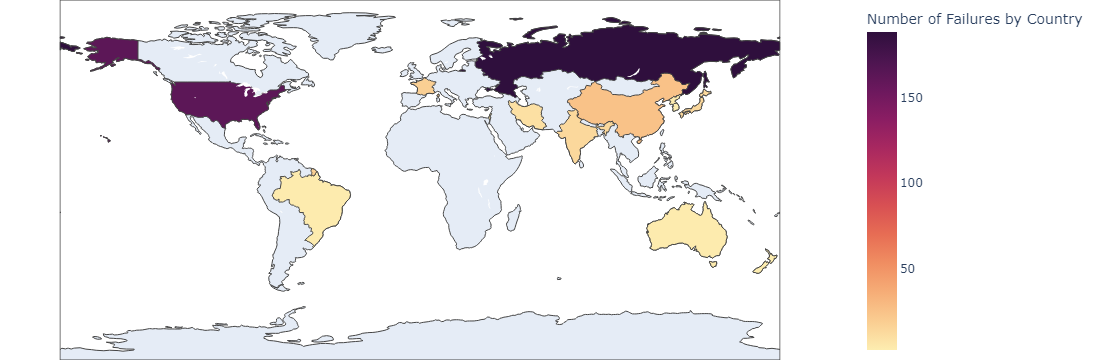

In [51]:
fig = px.choropleth(failures, locations=failures.index, color='counts',
                           color_continuous_scale="matter",
                           # range_color=(0, 12),
                           scope="world",
                           labels={'counts':'Number of Failures by Country'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, Organizations, and mission status. 

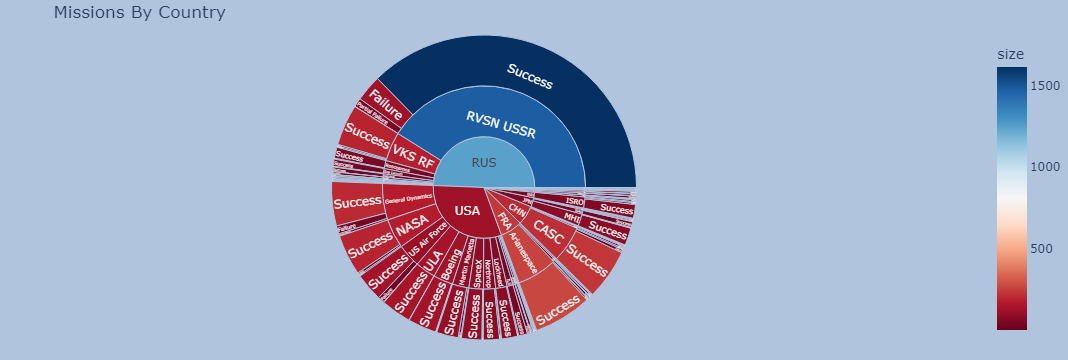

In [52]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values('size',ascending=False)
sunburst.head()
fig = px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"],
                  values="size", 
                  color='size',
                  color_continuous_scale='RdBu',
                  title = "Missions By Country")
# fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.update_layout(
    margin=dict(l=0, r=0, t=35, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# Analyse the Total Amount of Money Spent by Organization on Space Missions

In [53]:
total_money_spent = df_data.groupby('Organisation')['Price'].sum().reset_index()
total_money_spent.sort_values('Price', ascending=False, inplace=True)
total_money_spent

Organisation     Price
35              NASA 77,531.44
40         RVSN USSR 51,135.18
3        Arianespace 20,585.98
48               ULA 15,771.34
7               CASC  8,495.51
17  General Dynamics  5,816.86
46            SpaceX  5,467.17
52            VKS RF  5,442.26
49      US Air Force  4,679.51
32               MHI  4,621.71
6             Boeing  4,230.54
36          Northrop  3,930.00
34   Martin Marietta  3,154.75
23              ISRO  2,385.57
19               ILS  2,084.77
42         Roscosmos  1,929.09
31          Lockheed  1,925.41
45        Sea Launch    834.29
22              ISAS    695.24
28         Kosmotras    638.00
14          Eurockot    543.40
50           US Navy    393.97
13               ESA    315.10
21               ISA    301.27
5        Blue Origin    278.10
24              JAXA    260.70
18               IAI    254.92
15            ExPace    236.87
2                ASI    208.57
10              CNES    185.40
1               AMBA    185.40
29       Land Launch    162.22
33              MITT    162.22
26              KCST    115.87
51                UT    115.87
8              CASIC    115.87
41        Rocket Lab     97.50
4    Arm??e de l'Air     92.70
9             CECLES     92.70
16              Exos     92.70
43               SRC     69.52
0                AEB     69.52
25              KARI     69.52
39               RAE     46.35
37           OKB-586     46.35
54          Yuzhmash     46.35
38          OneSpace     23.17
30         Landspace     23.17
47           Starsem     23.17
27        Khrunichev     23.17
20              IRGC     23.17
11           Douglas     23.17
55           i-Space     23.17
12               EER     20.00
44            Sandia     15.00
53      Virgin Orbit     12.00

# Analyse the Amount of Money Spent by Organization per Launch

In [54]:
expenses_per_launch = df_data.groupby("Organisation")["Price"].mean().reset_index()
expenses_per_launch.sort_values("Price", ascending=False)

Organisation  Price
35              NASA 381.93
48               ULA 112.65
3        Arianespace  73.78
32               MHI  55.02
46            SpaceX  54.67
36          Northrop  47.35
19               ILS  45.32
14          Eurockot  41.80
24              JAXA  37.24
42         Roscosmos  35.07
7               CASC  33.85
23              ISRO  31.39
6             Boeing  31.11
49      US Air Force  29.07
28         Kosmotras  29.00
40         RVSN USSR  28.78
34   Martin Marietta  27.67
52            VKS RF  27.08
31          Lockheed  24.37
13               ESA  24.24
15            ExPace  23.69
45        Sea Launch  23.17
43               SRC  23.17
47           Starsem  23.17
39               RAE  23.17
38          OneSpace  23.17
50           US Navy  23.17
51                UT  23.17
37           OKB-586  23.17
54          Yuzhmash  23.17
33              MITT  23.17
0                AEB  23.17
30         Landspace  23.17
17  General Dynamics  23.17
2                ASI  23.17
4    Arm??e de l'Air  23.17
5        Blue Origin  23.17
8              CASIC  23.17
9             CECLES  23.17
10              CNES  23.17
11           Douglas  23.17
16              Exos  23.17
29       Land Launch  23.17
55           i-Space  23.17
18               IAI  23.17
20              IRGC  23.17
21               ISA  23.17
22              ISAS  23.17
25              KARI  23.17
26              KCST  23.17
27        Khrunichev  23.17
1               AMBA  23.17
12               EER  20.00
44            Sandia  15.00
53      Virgin Orbit  12.00
41        Rocket Lab   7.50

# Chart the Number of Launches per Year

In [55]:
df_data['Year'] = df_data['Date'].dt.year

In [56]:
launches_per_year = df_data['Year'].value_counts().reset_index().sort_values("Year")
launches_per_year.head()

Year  count
63  1957      3
61  1958     28
62  1959     20
57  1960     39
42  1961     52

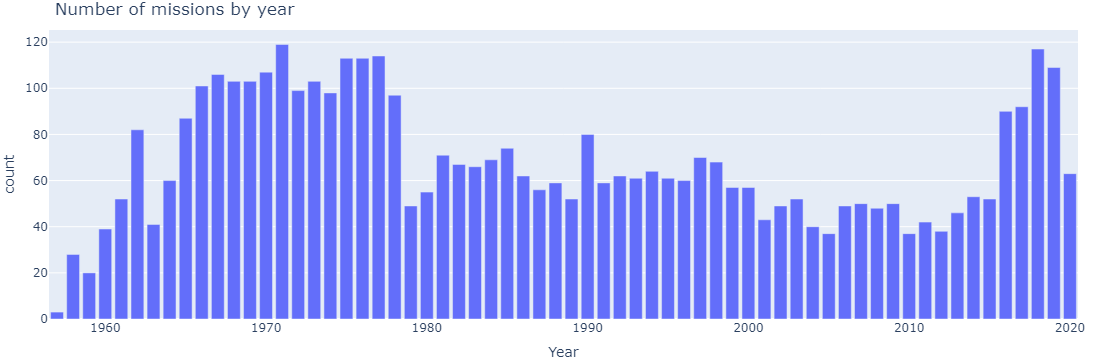

In [57]:
fig = px.bar(
    launches_per_year,
    x="Year",
    y="count",
    title='Number of missions by year',
)
fig.update_layout(margin = dict(t=30, l=0, r=15, b=0))
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [58]:
df_data["Month"] = df_data['Date'].dt.month

In [59]:
launches_per_month = df_data.Month.value_counts().reset_index()
launches_per_month

Month  count
0      12    450
1       6    402
2       4    383
3      10    381
4       8    373
5       9    365
6       3    353
7       7    351
8       2    336
9      11    336
10      5    326
11      1    268

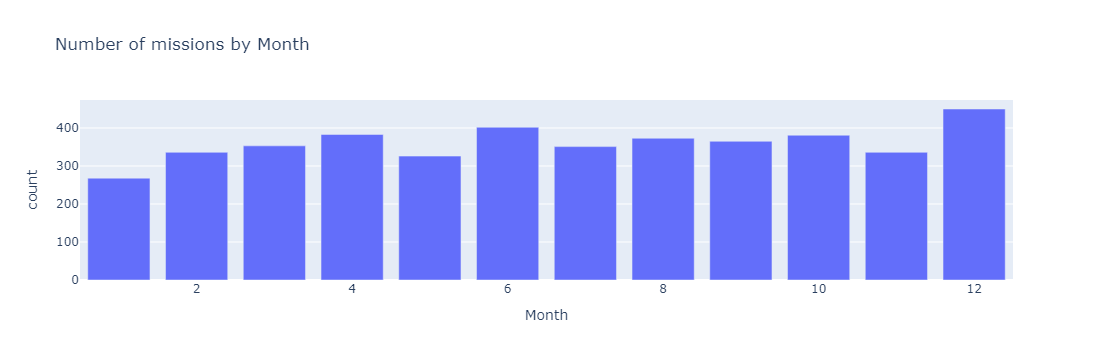

In [60]:
fig = px.bar(
    launches_per_month,
    x="Month",
    y="count",
    title='Number of missions by Month',
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [61]:
# Most popular month for launches.
launches_per_month.sort_values("count", ascending=False).head(1)

Month  count
0     12    450

In [62]:
# Least popular month for launches.
launches_per_month.sort_values("count").head(1)

Month  count
11      1    268

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

Text(0.5, 1.0, 'The Launch Price variation Over Time')

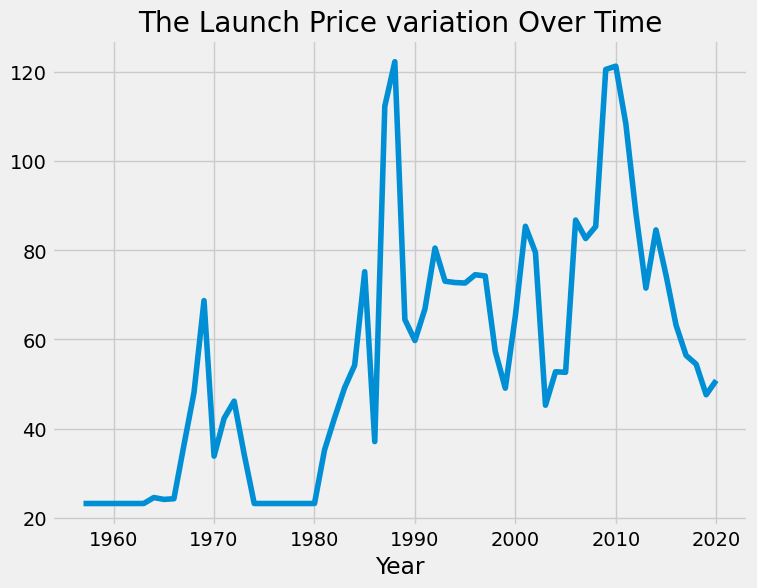

In [63]:
df_data.groupby('Year')['Price'].mean().plot(figsize=(8, 6))
plt.title('The Launch Price variation Over Time')

<Axes: xlabel='Year', ylabel='Price'>

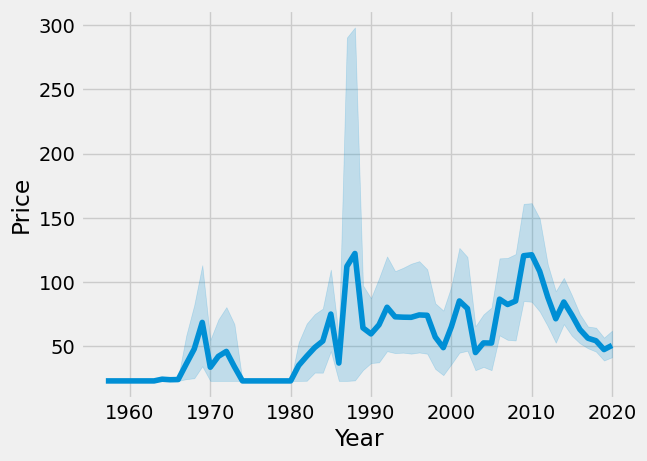

In [64]:
sns.lineplot(df_data, x="Year", y="Price")

# Chart the Number of Launches over Time by the Top 10 Organizations. 

How has the dominance of launches changed over time between the different players? 

In [65]:
plt.style.use("fivethirtyeight")

In [66]:
top_10_org = df_data.groupby("Organisation").count().sort_values("Date", ascending=False)[:10].index

Text(0.5, 0, 'Year')

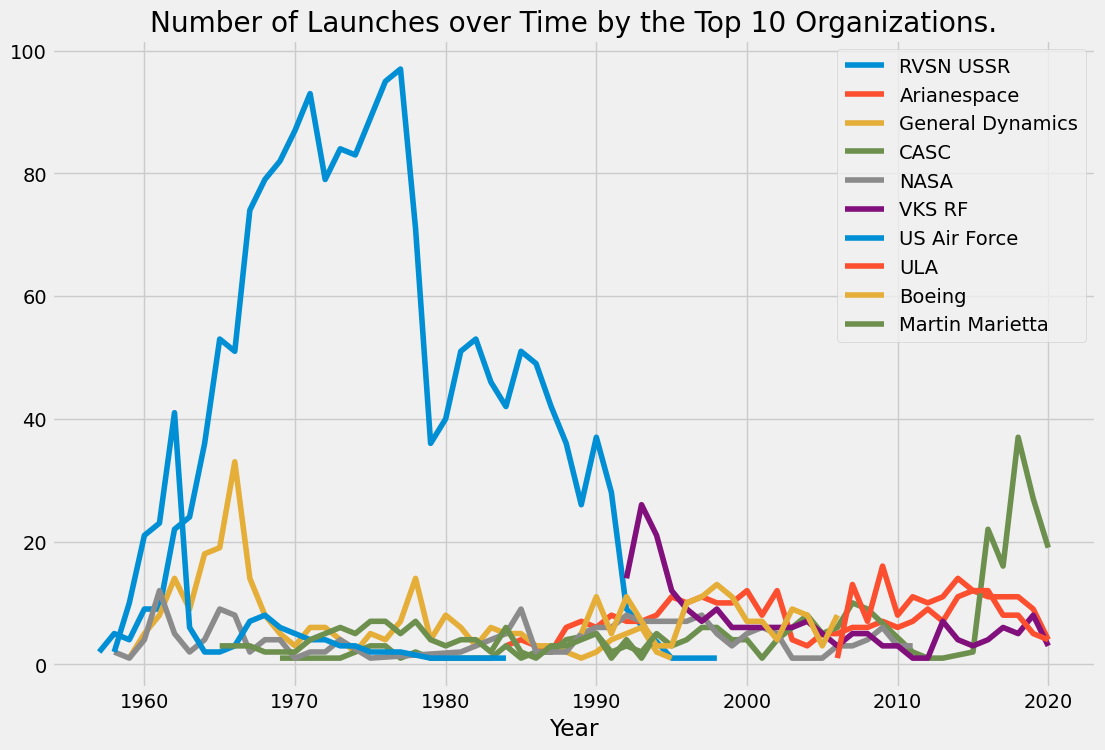

In [67]:
plt.figure(figsize=(12,8))
for org in top_10_org:
    df_data[df_data['Organisation']==org].groupby("Year")['Organisation'].count().plot(label=org)
plt.legend()
plt.title("Number of Launches over Time by the Top 10 Organizations.")
plt.xlabel("Year")

In [68]:
df_top_10_org = df_data[df_data['Organisation'].isin(top_10_org)].groupby(["Organisation","Year"]).size().reset_index(name='count')
df_top_10_org

Organisation  Year  count
0    Arianespace  1984      3
1    Arianespace  1985      4
2    Arianespace  1986      3
3    Arianespace  1987      2
4    Arianespace  1988      6
..           ...   ...    ...
318       VKS RF  2016      4
319       VKS RF  2017      6
320       VKS RF  2018      5
321       VKS RF  2019      8
322       VKS RF  2020      3

[323 rows x 3 columns]

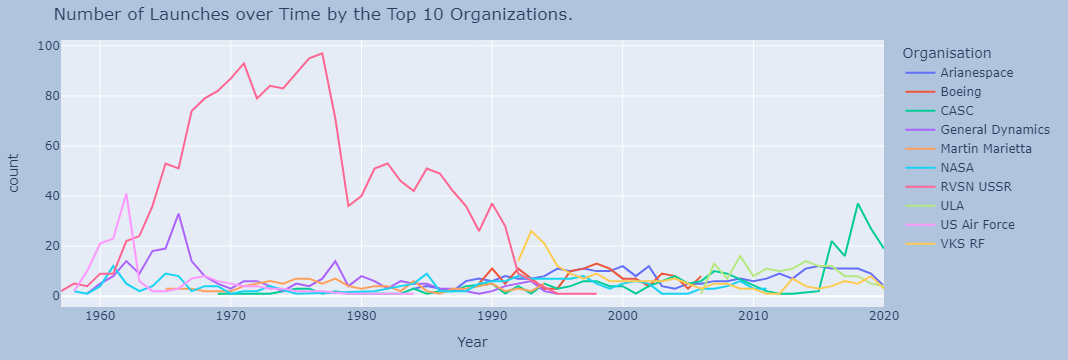

In [69]:
fig = px.line(df_top_10_org, x="Year", y="count", 
              color='Organisation',
              title="Number of Launches over Time by the Top 10 Organizations.")
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [70]:
camps = df_data[df_data["Year"] <= 1991]['Country'].value_counts().head(2).rename_axis('Country').reset_index(name="total")
camps

Country  total
0     RUS   1770
1     USA    662

In [71]:
# df_data.Country.unique()

cold_war_period = df_data["Year"] <= 1991 
USSR = df_data['Country'] == "RUS"
USA = df_data['Country'] == "USA"

In [72]:
camps = df_data[(USSR | USA) & cold_war_period]['Country'].value_counts().rename_axis('Country').reset_index(name="total")
camps

Country  total
0     RUS   1770
1     USA    662

In [73]:
colors = ["#355070", "#eaac8b"]
# "#e56b6f", "#eaac8b"]

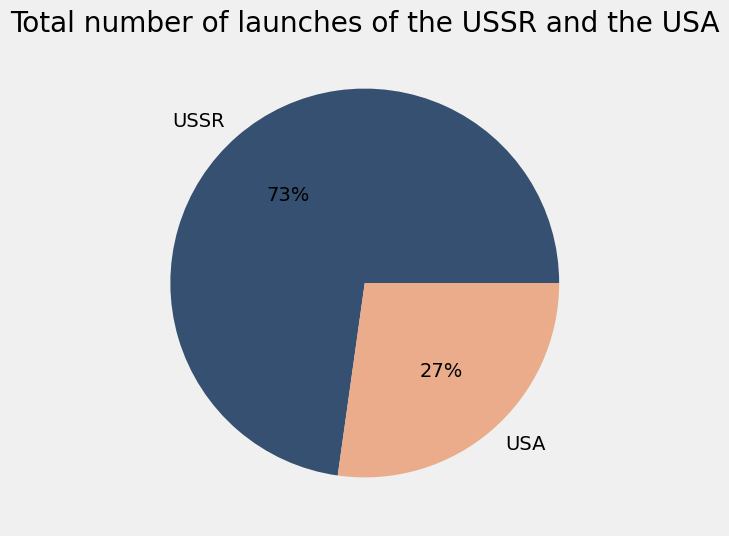

In [74]:
plt.figure(figsize=(12,6))
plt.pie(
    camps.total, 
    labels=['USSR', 'USA'], 
    colors=colors, 
    autopct='%.0f%%'
)
plt.title("Total number of launches of the USSR and the USA")
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [75]:
df_cold_war = df_data[(USSR | USA) & cold_war_period]
df_cold_war.head()

Organisation                                      Location  \
1718         RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   
1719          Yuzhmash        Site 32/2, Plesetsk Cosmodrome, Russia   
1721  General Dynamics     SLC-36B, Cape Canaveral AFS, Florida, USA   
1722  General Dynamics       SLC-3W, Vandenberg AFB, California, USA   
1723         RVSN USSR       Site 133/3, Plesetsk Cosmodrome, Russia   

                          Date                                 Detail  \
1718 1991-12-20 12:00:00+00:00         Rokot/Briz K | GVM Demo Flight   
1719 1991-12-18 03:54:00+00:00  Tsyklon-3 | Intercosmos 25 & Magion 3   
1721 1991-12-07 22:47:00+00:00                Atlas II | Eutelsat 2F3   
1722 1991-11-28 13:23:00+00:00     Atlas-E/F Star-37S-ISS | DMSP F-11   
1723 1991-11-27 03:30:00+00:00       Cosmos-3M (11K65M) | Cosmos 2173   

      Rocket_Status  Price Mission_Status Country  Year  Month  
1718  StatusRetired  23.17        Success     RUS  1991     12  
1719  StatusRetired  23.17        Success     RUS  1991     12  
1721  StatusRetired  23.17        Success     USA  1991     12  
1722  StatusRetired  23.17        Success     USA  1991     11  
1723  StatusRetired  23.17        Success     RUS  1991     11

In [76]:
missions_per_cold_war = df_cold_war.groupby(['Country',"Year"]).size()
# .rename_axis(['Country',"Year"]).reset_index(name="count")

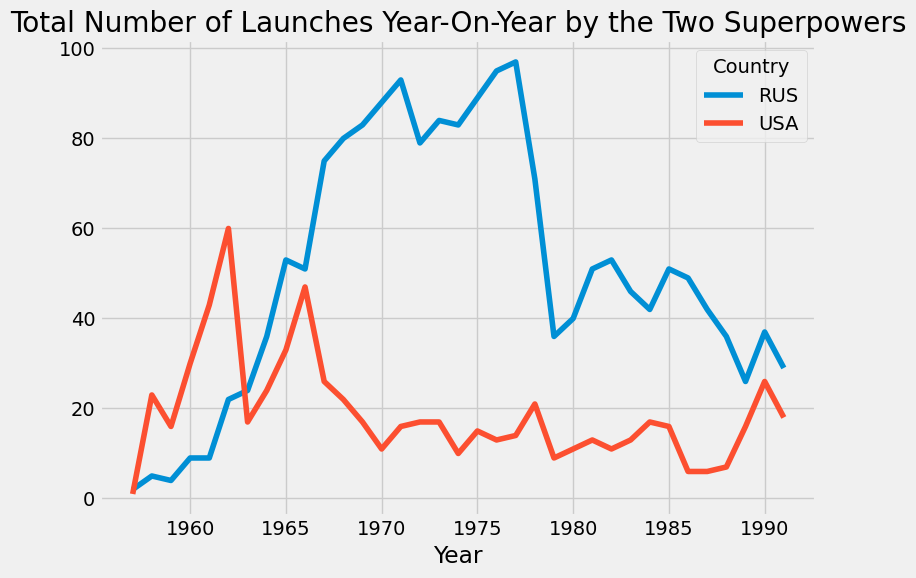

In [77]:
ax = missions_per_cold_war.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(8, 6))
plt.title('Total Number of Launches Year-On-Year by the Two Superpowers')
plt.tight_layout()

In [78]:
ussr_vs_usa = missions_per_cold_war.reset_index(name='count')

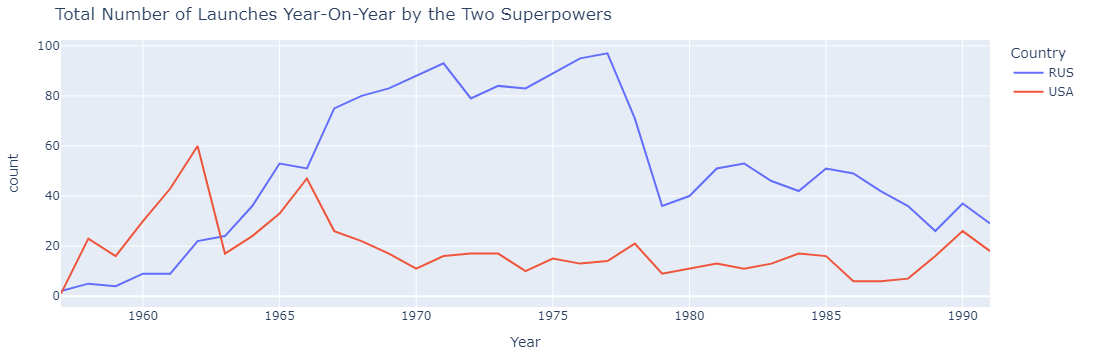

In [79]:
fig = px.line(ussr_vs_usa, x="Year", y="count", 
              color='Country',
              title='Total Number of Launches Year-On-Year by the Two Superpowers')

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [80]:
# df_cold_war[(df_cold_war['Year'] == 1957) & USA]['Mission_Status'].value_counts()

In [81]:
total_faiure_over_years = df_data[df_data['Mission_Status'].str.contains('Fail')].groupby('Year').size().reset_index(name='count')
# total_faiure_over_years = total_faiure_over_years.set_index('Year')
total_faiure_over_years.tail()

Year  count
59  2016      4
60  2017      8
61  2018      4
62  2019      9
63  2020      6

In [82]:
# ax = total_faiure_over_years.set_index('Year').plot(kind='bar', subplots=False, rot=0, figsize=(12, 6))
# plt.title('Total Number of Mission Failures Year-On-Year')
# plt.xticks(rotation='vertical')
# plt.tight_layout()

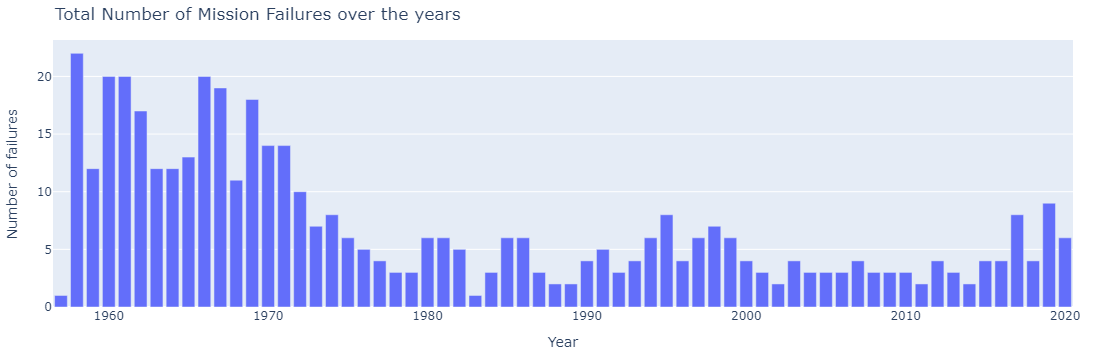

In [83]:
fig = px.bar(total_faiure_over_years, 
             x='Year', 
             y='count', 
             # color='leading_Country',
             labels={'count':'Number of failures'},
             title = "Total Number of Mission Failures over the years")

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)

fig.show()

In [84]:
faiure_cold_war = df_cold_war[df_cold_war['Mission_Status'].str.contains('Fail')].groupby(['Country','Year']).size()
faiure_cold_war

Country  Year
RUS      1958    4
         1959    2
         1960    6
         1961    4
         1962    7
                ..
USA      1986    2
         1987    1
         1988    1
         1990    1
         1991    2
Length: 61, dtype: int64

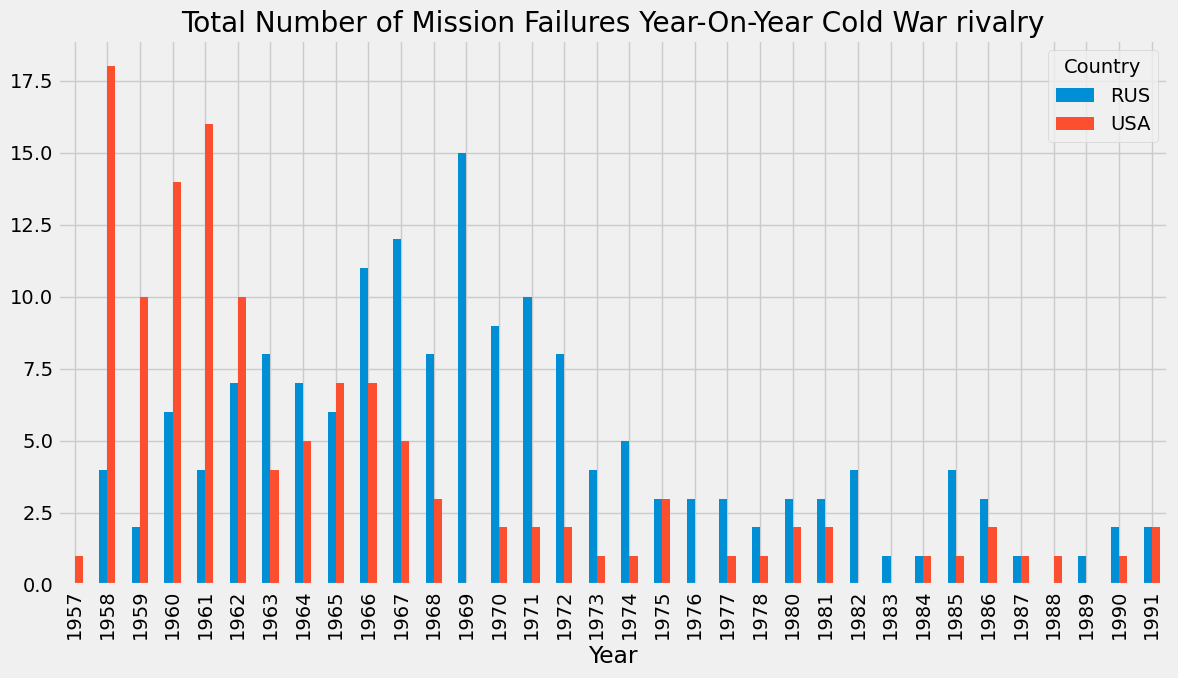

In [85]:
ax = faiure_cold_war.unstack(level=0).plot(kind='bar', subplots=False, rot=0, figsize=(12, 7))
plt.title('Total Number of Mission Failures Year-On-Year Cold War rivalry')
plt.xticks(rotation='vertical')
plt.tight_layout()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [86]:
fails_percentage = df_cold_war.groupby(['Country','Year']).agg(
          total = ('Mission_Status', pd.Series.count),
          fails = ('Mission_Status', lambda x : x.str.contains('Fail').sum()),
)

In [87]:
fails_percentage['percentage'] = fails_percentage['fails'] / fails_percentage['total'] * 100
fails_percentage.tail(10)

total  fails  percentage
Country Year                          
USA     1982     11      0        0.00
        1983     13      0        0.00
        1984     17      1        5.88
        1985     16      1        6.25
        1986      6      2       33.33
        1987      6      1       16.67
        1988      7      1       14.29
        1989     16      0        0.00
        1990     26      1        3.85
        1991     18      2       11.11

In [88]:
# df_cold_war[(df_cold_war['Year'] == 1957)  & USA]['Mission_Status'].value_counts()

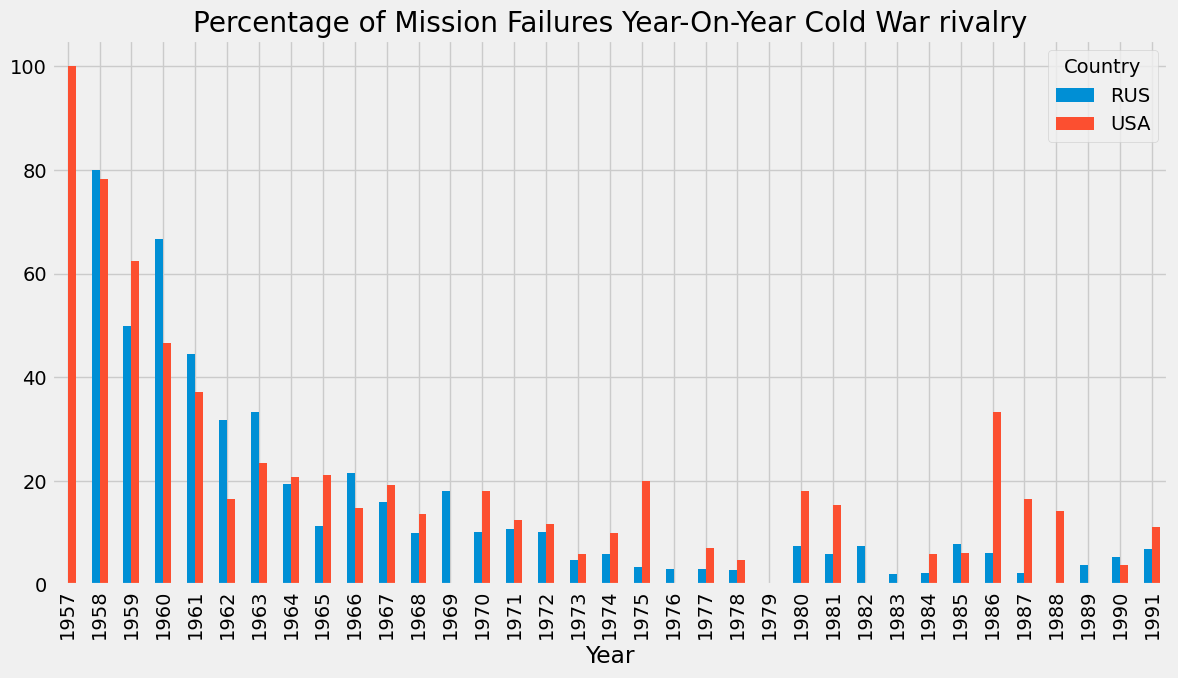

In [89]:
ax = fails_percentage['percentage'].unstack(level=0).plot(kind='bar', subplots=False, rot=0, figsize=(12, 7))
plt.title('Percentage of Mission Failures Year-On-Year Cold War rivalry')
plt.xticks(rotation='vertical')
plt.tight_layout()

In [90]:
total_fails_percentage = df_cold_war.groupby('Year').agg(
          total = ('Mission_Status', pd.Series.count),
          fails = ('Mission_Status', lambda x : x.str.contains('Fail').sum()),
)

In [91]:
total_fails_percentage['percentage'] = total_fails_percentage['fails'] / total_fails_percentage['total'] * 100
# total_fails_percentage.tail()

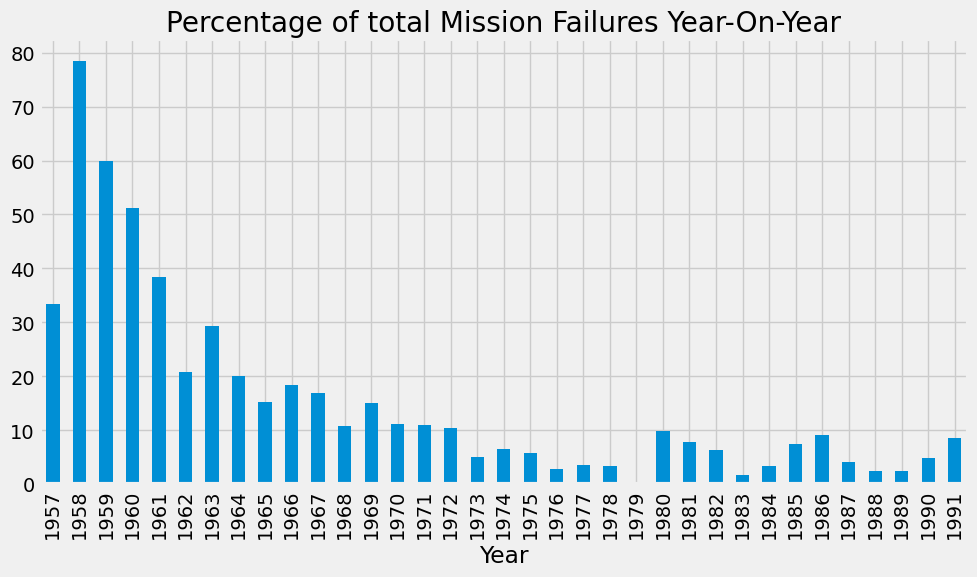

In [92]:
ax = total_fails_percentage['percentage'].plot(kind='bar', subplots=False, rot=0, figsize=(10, 6))
plt.title('Percentage of total Mission Failures Year-On-Year')
plt.xticks(rotation='vertical')
plt.tight_layout()

In [93]:
# total_fails_percentage.loc[1979]

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [94]:
# Filtering data by successful launches and group it by Country and Year then unstack it
df_lead = df_data[df_data['Mission_Status'] == "Success"].groupby(['Country','Year']).size().unstack(level=0)

In [95]:
# Then concat two pandas.series of the leading countries and number of missions of the corresponding year
df_lead_countries = pd.concat([df_lead.idxmax(axis=1),df_lead.max(axis=1)], axis=1)

In [96]:
df_lead_countries = df_lead_countries.rename(columns={0: "leading_Country", 1: "Number_of_launches"}, errors="raise")

In [97]:
df_lead_countries

leading_Country  Number_of_launches
Year                                    
1957             RUS                2.00
1958             USA                5.00
1959             USA                6.00
1960             USA               16.00
1961             USA               27.00
...              ...                 ...
2016             USA               26.00
2017             USA               30.00
2018             CHN               38.00
2019             CHN               32.00
2020             USA               20.00

[64 rows x 2 columns]

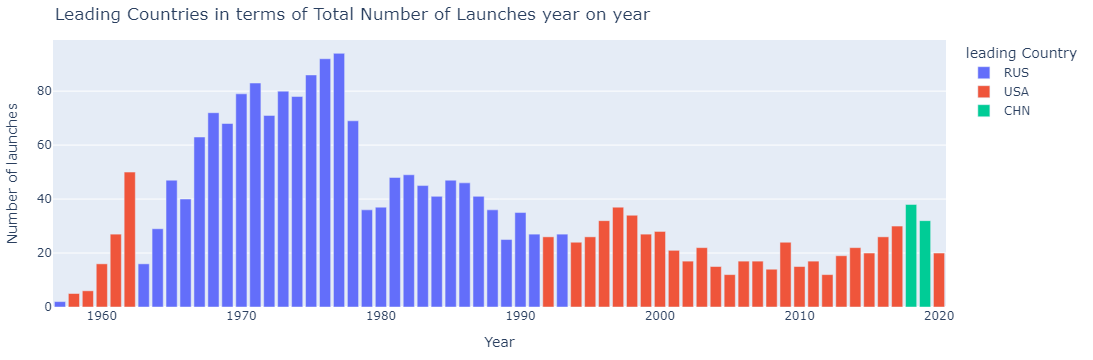

In [98]:
fig = px.bar(df_lead_countries, x=df_lead_countries.index, y='Number_of_launches', 
             color='leading_Country',
             labels={'Number_of_launches':'Number of launches', "leading_Country":"leading Country"},
             title = "Leading Countries in terms of Total Number of Launches year on year")

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)

fig.show()
fig.write_image("leading_country.png") 

# Create a Year-on-Year Chart Showing the Organization Doing the Most Number of Launches

Which organization was dominant in the 1970s and 1980s? Which organization was dominant in 2018, 2019 and 2020? 

In [99]:
df = df_data.groupby(['Organisation','Year']).size().unstack(level=0)
df_lead_org = pd.concat([df.idxmax(axis=1), df.max(axis=1)], axis=1)

In [100]:
df_lead_org = df_lead_org.rename(columns={0: "leading_Organization", 1: "Number_of_launches"}, errors="raise")

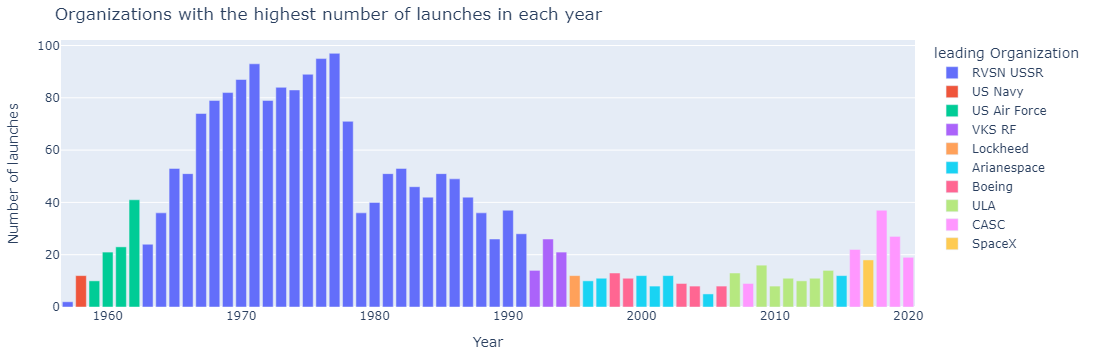

In [102]:
fig = px.bar(df_lead_org, x=df_lead_org.index, y='Number_of_launches', 
             color='leading_Organization',
             labels={'Number_of_launches':'Number of launches', "leading_Organization":"leading Organization"},
             title = "Organizations with the highest number of launches in each year")

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)

fig.show()
fig.write_image("leading_Organization.png") 